In [2]:
from tensorflow import keras
from keras.models import load_model
from time import sleep
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from mtcnn import MTCNN

In [3]:
face_classifier = cv2.CascadeClassifier(r"A:\CODING\Python\Projects\emotion-detector\haarcascade_frontalface_default.xml")
classifier =load_model(r"A:\CODING\Python\Projects\emotion-detector\emotion-detector-model.h5")

In [4]:
detector = MTCNN()

In [5]:
emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']

In [6]:
def pass_photo_haarcascade(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray)
    label = "final_emotion"
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)
        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)
            prediction = classifier.predict(roi)[0]
            label=emotion_labels[prediction.argmax()]
            label_position = (x,y)
            cv2.putText(img,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        else:
            cv2.putText(img,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    return label

In [7]:
def pass_photo_mtcnn(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = detector.detect_faces(img)
    label = "final_emotion"
    for i in faces:
        x,y,w,h = i['box']
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)
        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)
            prediction = classifier.predict(roi)[0]
            label=emotion_labels[prediction.argmax()]
            label_position = (x,y)
            cv2.putText(img,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        else:
            cv2.putText(img,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    return label

In [8]:
def print_photo(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(img)

# Testing on webcam

In [9]:
cap = cv2.VideoCapture(0)
while True:
    _, frame = cap.read()
    labels = []
    emotion = pass_photo_haarcascade(frame)
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('x'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


# Testing it on photos

1/1 [==============================] - 0s 50ms/step
Happy


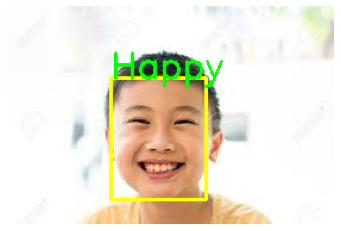

In [76]:
my_img = cv2.imread(r"C:\Users\aashi\Downloads\happy.jpeg")
answer = pass_photo_mtcnn(my_img)
print(answer)
print_photo(my_img)

1/1 [==============================] - 0s 43ms/step
Sad


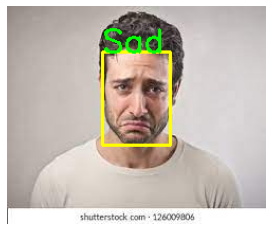

In [66]:
my_img = cv2.imread(r"C:\Users\aashi\Downloads\sad.jpeg")
answer = pass_photo1(my_img)
print(answer)
print_photo(my_img)

1/1 [==============================] - 0s 50ms/step
Angry


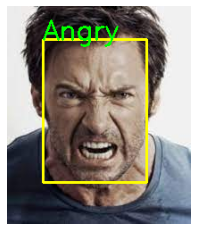

In [67]:
my_img = cv2.imread(r"C:\Users\aashi\Downloads\angry.jpeg")
answer = pass_photo1(my_img)
print(answer)
print_photo(my_img)

1/1 [==============================] - 0s 46ms/step
Surprise


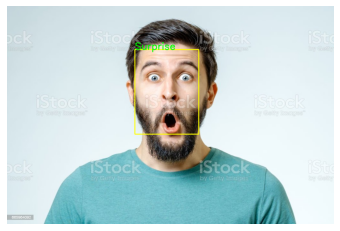

In [68]:
my_img = cv2.imread(r"C:\Users\aashi\Downloads\surprise.jpg")
answer = pass_photo1(my_img)
print(answer)
print_photo(my_img)

1/1 [==============================] - 0s 40ms/step
Disgust


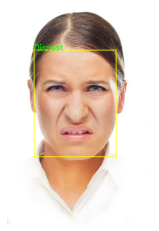

In [69]:
my_img = cv2.imread(r"C:\Users\aashi\Downloads\disgust.jpg")
answer = pass_photo1(my_img)
print(answer)
print_photo(my_img)

1/1 [==============================] - 0s 48ms/step
Fear


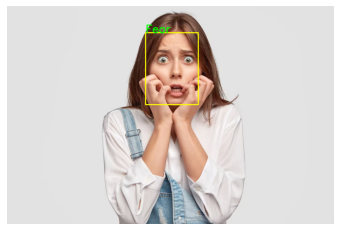

In [71]:
my_img = cv2.imread(r"C:\Users\aashi\Downloads\fear.jpg")
answer = pass_photo1(my_img)
print(answer)
print_photo(my_img)